# FlowDenoising User Manual

FlowDenoising is a low-pass filtering tool for volumetric data. A 1D Gaussian filter is applied to each dimension Z, Y and X (in this order), resulting in a 3D filtering. Unlike classical Gaussian filtering, the 2D slices (in each dimension) are aligned to minimize the smoothing of the structures recognized by the Optical Flow (OF) estimator.

## 1. Installing the required packages

In [ ]:
!pip install -r ../requirements.txt

In [ ]:
# Delete temporal files
#!rm -f *.mrc *.tif

## 2. Denoising using the default parameters

The default parameters are:

In [ ]:
!python ../flowdenoising.py -h

### Download a (small) volume
This example uses a 32x256x256 (Z, Y, X) crop of the [EMPIAR-10311](https://www.ebi.ac.uk/empiar/EMPIAR-10310/) volume.

In [ ]:
%%bash
OUTPUT_FILENAME="small_vol.mrc"
if test ! -f $OUTPUT_FILENAME ; then
    FILEID="1jYL6FEMeWGXO0KYlCb9udrICc2qaZLHB"
    wget --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O $OUTPUT_FILENAME 2> /dev/null
fi

In [ ]:
!ls -l *.mrc

### Filter (using [MRC](https://en.wikipedia.org/wiki/MRC_(file_format)) files)

In [113]:
%%time
!python ../flowdenoising_5.py -i small_vol.mrc -o denoised_vol.mrc -v 1

[2023-02-14 20:24:53,136] (INFO) Verbosity level = 1
[2023-02-14 20:24:53,137] (INFO) 0 %
[2023-02-14 20:24:53,137] (INFO) sigma=(2.0, 2.0, 2.0)
[2023-02-14 20:24:53,137] (INFO) reading "small_vol.mrc"
[2023-02-14 20:24:53,163] (INFO) shape of the input volume (Z, Y, X) = (32, 256, 256)
[2023-02-14 20:24:53,163] (INFO) type of the volume = float32
[2023-02-14 20:24:53,163] (INFO) vol requires 8.0 MB
[2023-02-14 20:24:53,165] (INFO) small_vol.mrc max = 255.0
[2023-02-14 20:24:53,166] (INFO) small_vol.mrc min = 0.0
[2023-02-14 20:24:53,167] (INFO) Input vol average = 163.53050231933594
[2023-02-14 20:24:53,167] (INFO) read "small_vol.mrc" in 0.017197573000000244 seconds
[2023-02-14 20:24:53,167] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-14 20:24:53,169] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-14 20:24:53,169] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-14 20:24:53,170] (INFO) length of each filter (Z, Y, X) = [17, 17, 17]
[2023-02-14 20:24:53,

In [114]:
!ls -l *.mrc

-rw-r--r-- 1 vruiz vruiz 419431424 feb  7 20:29 big_vol.mrc
-rw-r--r-- 1 vruiz vruiz 419431424 feb 13 16:48 denoised_big_vol.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 feb 13 16:36 denoised_small_vol_l0.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 feb 13 16:36 denoised_small_vol_l3.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 feb 13 16:36 denoised_small_vol.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 feb 13 16:37 denoised_small_vol_w17.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 feb 13 16:37 denoised_small_vol_w3.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 feb 14 20:25 denoised_vol.mrc
-rw-r--r-- 1 vruiz vruiz 419431424 feb 14 19:53 no_OF_denoised_big_vol.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 feb  7 22:11 small_vol.mrc


### Filter (using multi-page [TIFF](https://en.wikipedia.org/wiki/TIFF) files)

In [115]:
%%time
!python ../flowdenoising_5.py -i small_vol.mrc -o denoised_vol.tif -v 1

[2023-02-14 20:25:09,313] (INFO) Verbosity level = 1
[2023-02-14 20:25:09,313] (INFO) 0 %
[2023-02-14 20:25:09,314] (INFO) sigma=(2.0, 2.0, 2.0)
[2023-02-14 20:25:09,314] (INFO) reading "small_vol.mrc"
[2023-02-14 20:25:09,324] (INFO) shape of the input volume (Z, Y, X) = (32, 256, 256)
[2023-02-14 20:25:09,325] (INFO) type of the volume = float32
[2023-02-14 20:25:09,325] (INFO) vol requires 8.0 MB
[2023-02-14 20:25:09,326] (INFO) small_vol.mrc max = 255.0
[2023-02-14 20:25:09,328] (INFO) small_vol.mrc min = 0.0
[2023-02-14 20:25:09,330] (INFO) Input vol average = 163.53050231933594
[2023-02-14 20:25:09,331] (INFO) read "small_vol.mrc" in 0.016248578999999985 seconds
[2023-02-14 20:25:09,331] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-14 20:25:09,333] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-14 20:25:09,334] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-14 20:25:09,336] (INFO) length of each filter (Z, Y, X) = [17, 17, 17]
[2023-02-14 20:25:09,

In [ ]:
!ls -l *.tif

### Filtering without optical flow (OF) compensation

In [102]:
%%time
!python ../flowdenoising_5.py -i small_vol.mrc -o no_OF_denoised_vol.tif --no_OF -v 1 -s 4.0 4.0 4.0

[2023-02-14 19:50:21,477] (INFO) Verbosity level = 1
[2023-02-14 19:50:21,478] (INFO) 0 %
[2023-02-14 19:50:21,478] (INFO) sigma=(4.0, 4.0, 4.0)
[2023-02-14 19:50:21,478] (INFO) reading "small_vol.mrc"
[2023-02-14 19:50:21,488] (INFO) shape of the input volume (Z, Y, X) = (32, 256, 256)
[2023-02-14 19:50:21,488] (INFO) type of the volume = float32
[2023-02-14 19:50:21,488] (INFO) vol requires 8.0 MB
[2023-02-14 19:50:21,489] (INFO) small_vol.mrc max = 255.0
[2023-02-14 19:50:21,490] (INFO) small_vol.mrc min = 0.0
[2023-02-14 19:50:21,491] (INFO) Input vol average = 163.53050231933594
[2023-02-14 19:50:21,491] (INFO) read "small_vol.mrc" in 0.013218098999999928 seconds
[2023-02-14 19:50:21,491] (INFO) Computing gaussian kernel with sigma=4.0
[2023-02-14 19:50:21,494] (INFO) Computing gaussian kernel with sigma=4.0
[2023-02-14 19:50:21,496] (INFO) Computing gaussian kernel with sigma=4.0
[2023-02-14 19:50:21,498] (INFO) length of each filter (Z, Y, X) = [33, 33, 33]
[2023-02-14 19:50:21,

In [96]:
!ls -l *.tif

-rw-r--r-- 1 vruiz vruiz 2102554 feb 13 16:36 denoised_vol.tif
-rw-r--r-- 1 vruiz vruiz 2102554 feb 14 19:17 no_OF_denoised_vol.tif


### Compare

In [116]:
import skimage.io
import mrcfile
vol_MRC = mrcfile.open("small_vol.mrc")
vol = vol_MRC.data
denoised_vol = skimage.io.imread("denoised_vol.tif", plugin="tifffile")
no_OF_denoised_vol = skimage.io.imread("no_OF_denoised_vol.tif", plugin="tifffile")

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

<IPython.core.display.Math object>

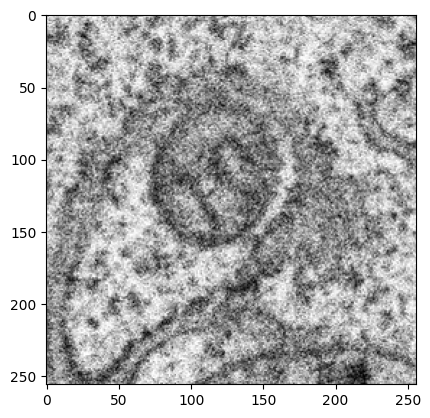

In [118]:
from IPython.display import display, Math
display(Math("\mathtt{Original~slice}:"))
imgplot = plt.imshow(vol[15], cmap="gray")

<IPython.core.display.Math object>

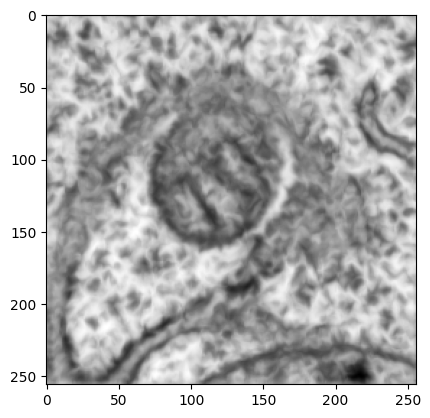

In [119]:
display(Math("\mathtt{Denoised~slice~using~OF~}(\sigma=2):"))
imgplot = plt.imshow(denoised_vol[15], cmap="gray")

<IPython.core.display.Math object>

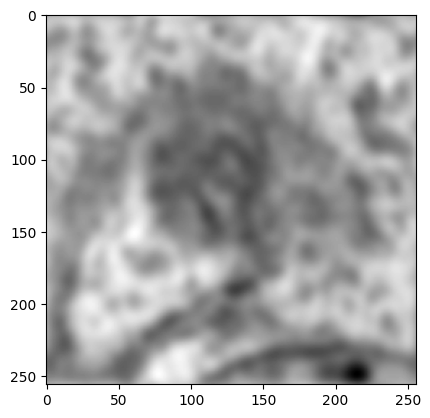

In [104]:
display(Math("\mathtt{Denoised~slice~using~standard~Gaussian~filtering~}(\sigma=2):"))
imgplot = plt.imshow(no_OF_denoised_vol[15], cmap="gray")

<IPython.core.display.Math object>

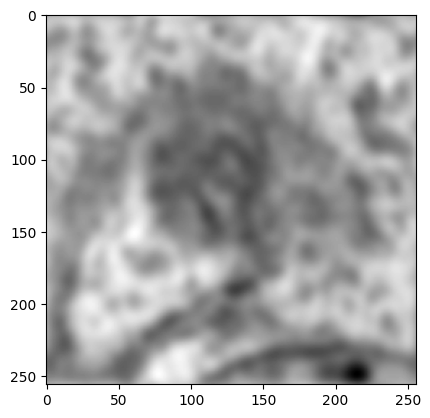

In [105]:
display(Math("\mathtt{Denoised~slice~using~standard~Gaussian~filtering~}(\sigma=2):"))
imgplot = plt.imshow(no_OF_denoised_vol[15], cmap="gray")

## 2. Controlling the length of the filters with the $\sigma$ parameters

### Example for $\sigma_\text{Z}=1.0, \sigma_\text{Y}=2.0~\text{and}~\sigma_\text{X}=0.1$
If $0<\sigma\le 0.1$, then no filtering is performed in the corresponding direction.

In [ ]:
%%time
!python ../flowdenoising.py -i small_vol.mrc -o denoised_small_vol.mrc -s 1.0 2.0 0.1 -v 1 2>&1 | grep length

In [ ]:
denoised_vol_MRC = mrcfile.open("denoised_small_vol.mrc")
denoised_vol = denoised_vol_MRC.data
display(Math("\mathtt{Denoised~slice~using~OF~}(\sigma_{\mathrm{Z}}=1.0, \sigma_{\mathrm{Y}}=2.0~\mathrm{and}~\sigma_{\mathrm{X}}=0.1):"))
imgplot = plt.imshow(denoised_vol[15], cmap="gray")

## 3. Controlling the search area with the `l` parameter

In [ ]:
%%time
!python ../flowdenoising.py -i small_vol.mrc -o denoised_small_vol_l0.mrc -l 0 -v 1 2>&1 | grep "l="

In [ ]:
%%time
!python ../flowdenoising.py -i small_vol.mrc -o denoised_small_vol_l3.mrc -l 3 -v 1 2>&1 | grep "l="

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(12, 12))
denoised_vol_MRC = mrcfile.open("denoised_small_vol_l0.mrc")
denoised_vol_l0 = denoised_vol_MRC.data
plt.subplot(1, 3, 1)
plt.title("original")
imgplot = plt.imshow(vol[15], cmap="gray")
plt.subplot(1, 3, 2)
plt.title(r"$\mathtt{l}=0$")
imgplot = plt.imshow(denoised_vol_l0[15], cmap="gray")
denoised_vol_MRC = mrcfile.open("denoised_small_vol_l3.mrc")
denoised_vol_l3 = denoised_vol_MRC.data
plt.subplot(1, 3, 3)
plt.title(r"$\mathtt{l}=3$")
imgplot = plt.imshow(denoised_vol_l3[15], cmap="gray")

## 4. Controlling the noise sensitivity with the `w` parameter

In [ ]:
%%time
!python ../flowdenoising.py -i small_vol.mrc -o denoised_small_vol_w3.mrc -w 3 -v 1 2>&1 | grep "w="

In [ ]:
%%time
!python ../flowdenoising.py -i small_vol.mrc -o denoised_small_vol_w17.mrc -w 17 -v 1 2>&1 | grep "w="

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(12, 12))
denoised_vol_MRC = mrcfile.open("denoised_small_vol_w3.mrc")
denoised_vol_w3 = denoised_vol_MRC.data
plt.subplot(1, 3, 1)
plt.title("original")
imgplot = plt.imshow(vol[15], cmap="gray")
plt.subplot(1, 3, 2)
plt.title(r"$\mathtt{w}=3$")
imgplot = plt.imshow(denoised_vol_w3[15], cmap="gray")
denoised_vol_MRC = mrcfile.open("denoised_small_vol_w17.mrc")
denoised_vol_w17 = denoised_vol_MRC.data
plt.subplot(1, 3, 3)
plt.title(r"$\mathtt{w}=17$")
imgplot = plt.imshow(denoised_vol_w17[15], cmap="gray")

## 4. Using a ("big") volume

In [ ]:
%%bash
OUTPUT_FILENAME="big_vol.mrc"
if test ! -f $OUTPUT_FILENAME ; then
    FILEID="1lSFb4VZ5iqR3kLdPv1dDbdOe9dKPZ--_"
    wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O $OUTPUT_FILENAME && rm -rf /tmp/cookies.txt 2> /dev/null
fi

In [ ]:
vol_MRC = mrcfile.open("big_vol.mrc")
vol = vol_MRC.data
print("(Z_size, Y_size, X_size) =", vol.shape)

In [ ]:
%%time
!python ../flowdenoising.py -i big_vol.mrc -o denoised_big_vol.mrc -l 0

In [108]:
%%time
!python ../flowdenoising_5.py -i big_vol.mrc -o no_OF_denoised_big_vol.mrc --no_OF 

0
1
2
3
4
5
6
7
0
1
2
3
4
5
6
7
0
1
2
3
4
5
6
7
CPU times: user 1.44 s, sys: 159 ms, total: 1.6 s
Wall time: 30.5 s


In [109]:
denoised_vol_MRC = mrcfile.open("denoised_big_vol.mrc")
denoised_vol = denoised_vol_MRC.data
no_OF_denoised_vol_MRC = mrcfile.open("no_OF_denoised_big_vol.mrc")
no_OF_denoised_vol = no_OF_denoised_vol_MRC.data

<IPython.core.display.Math object>

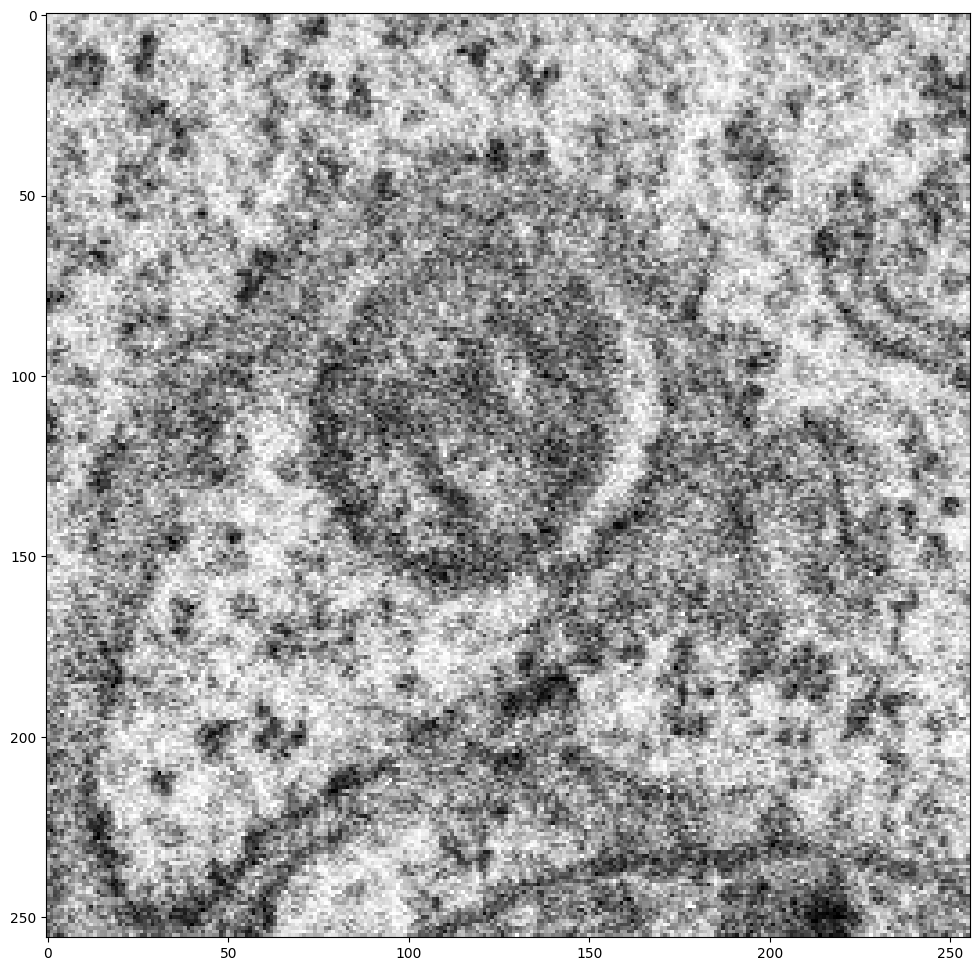

In [110]:
from matplotlib.pyplot import figure
figure(figsize=(12, 12))
display(Math("\mathtt{Original~slice}:"))
imgplot = plt.imshow(vol[vol.shape[0]//2], cmap="gray")

<IPython.core.display.Math object>

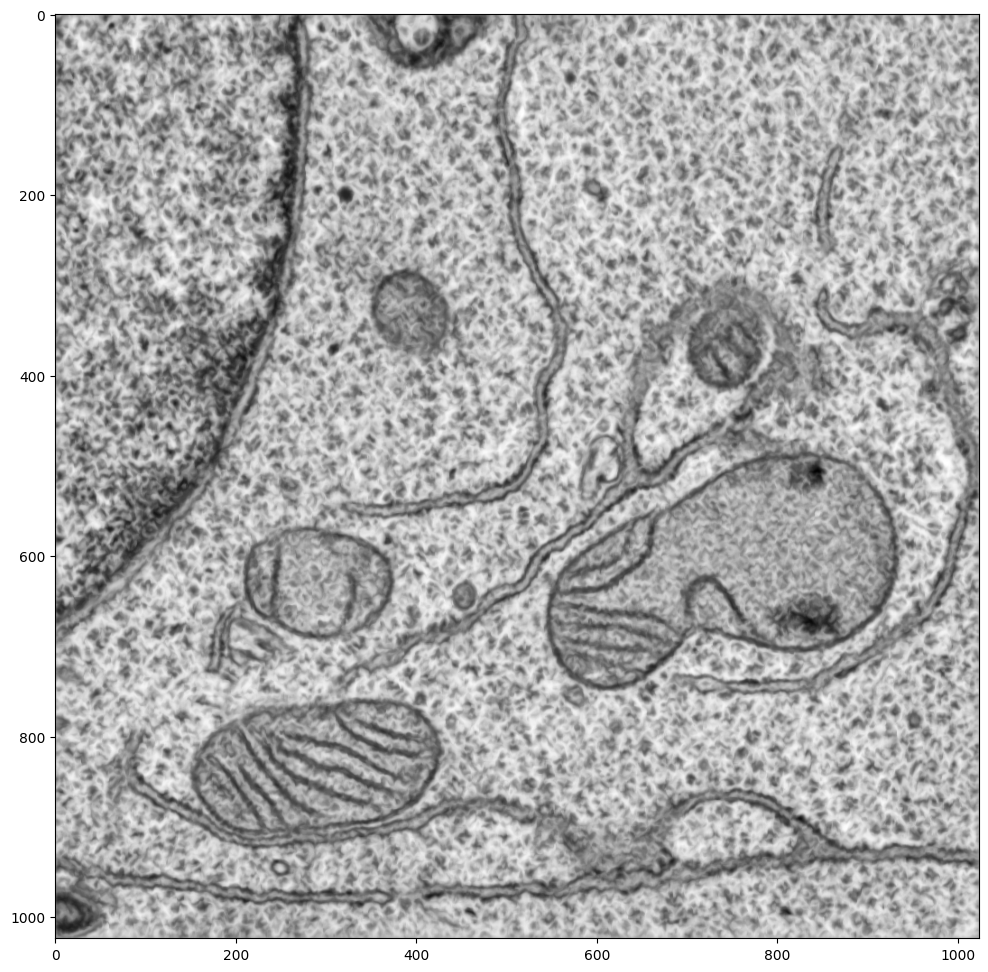

In [111]:
display(Math("\mathtt{Denoised~slice~using~OF}~(\sigma=2):"))
figure(figsize=(12, 12))
imgplot = plt.imshow(denoised_vol[vol.shape[0]//2], cmap="gray")

<IPython.core.display.Math object>

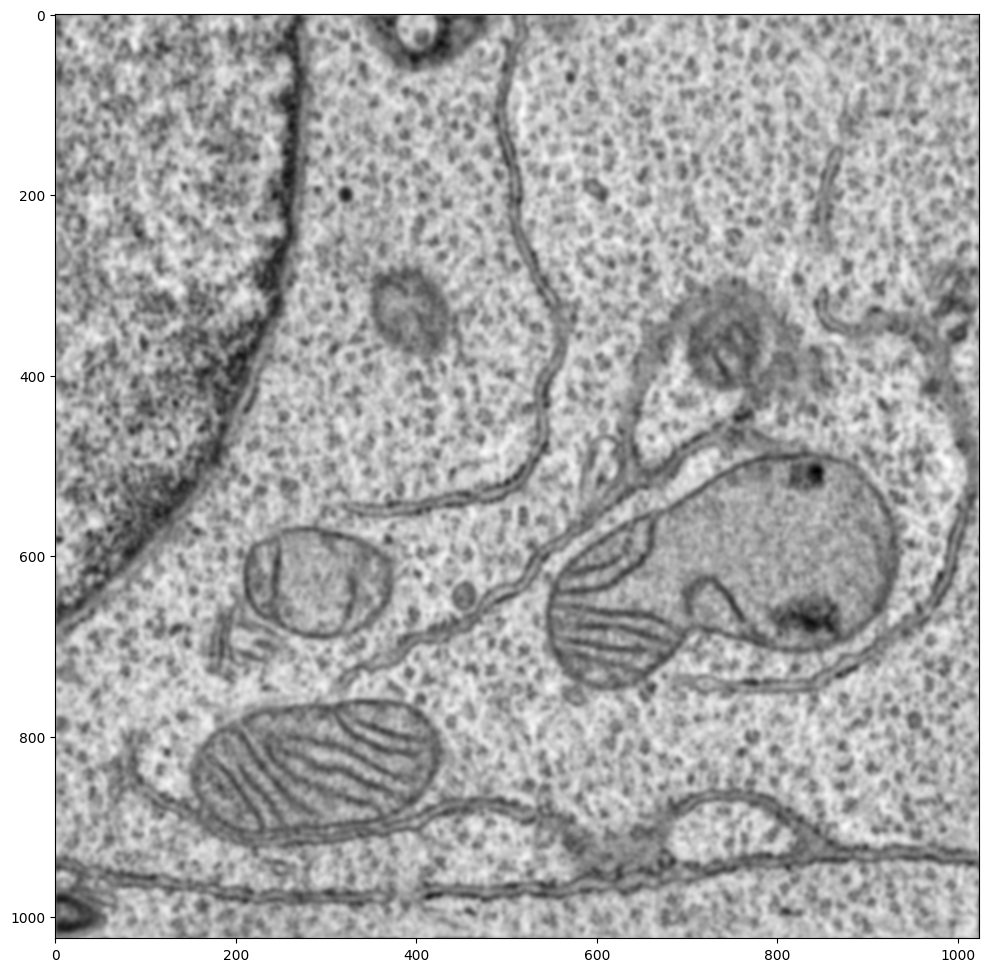

In [112]:
display(Math("\mathtt{Denoised~slice~using~standard~Gaussian~filtering}~(\sigma=2):"))
figure(figsize=(12, 12))
imgplot = plt.imshow(no_OF_denoised_vol[vol.shape[0]//2], cmap="gray")